In [13]:
import os
import numpy as np
from PIL import Image

def load_data():
    data = []
    label = []
    for i in range(1, 41):
        for j in range(1, 11):
            img_path = f"./data/ORL人脸数据库/s{i}/{j}.bmp"
            img = np.array(Image.open(img_path))
            data.append(img.flatten())
            label.append(i)
            
    return np.array(data), np.array(label)        

In [14]:
all_data, all_label = load_data()
all_data
# all_label

array([[ 48,  49,  45, ...,  47,  46,  46],
       [ 60,  60,  62, ...,  32,  34,  34],
       [ 39,  44,  53, ...,  29,  26,  29],
       ...,
       [125, 119, 124, ...,  36,  39,  40],
       [119, 120, 120, ...,  89,  94,  85],
       [125, 124, 124, ...,  36,  35,  34]], dtype=uint8)

In [15]:
# 计算协方差矩阵
def calc_cov(X):
    m = X.shape[0]
    # 标准化
    X = (X - np.mean(X, axis=0)) / np.var(X, axis=0) 
    return 1 / m * np.matmul(X.T, X)


def pca(X, n_components):
    
    cov_matrix = calc_cov(X)
    # eigenvalues特征值，eigenvectors特征向量
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix) 
    # print(eigenvalues)
    
    idx = eigenvalues.argsort()[::-1]
    
    # 取最大的前n_component主成分
    eigenvectors = eigenvectors[:, idx]
    eigenvectors = eigenvectors[:, :n_components]

    return np.matmul(X, eigenvectors)

In [16]:
# pca_result = np.float32(pca(all_data, ))

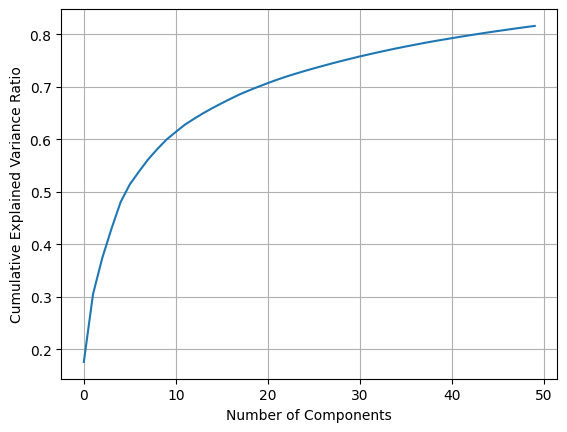

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=50)
pca.fit(all_data)

# 获取累计解释方差比例
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# 绘制累计解释方差比例曲线
plt.plot(cumulative_explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

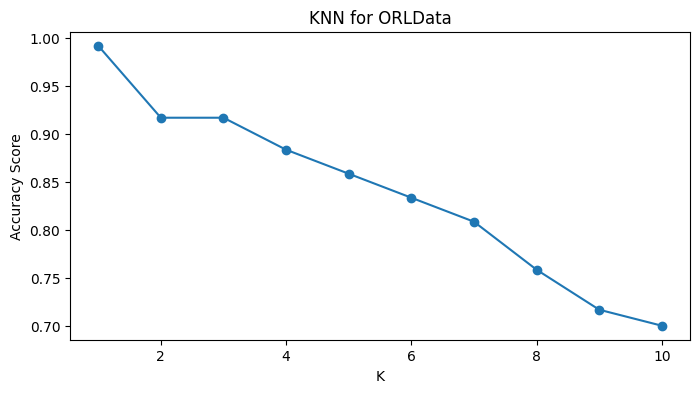

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def train(X_train, y_train, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return knn

def test(knn, X_test, y_test):
    score = knn.score(X_test, y_test)
    return score

reduced_data = pca.transform(all_data)
X_train, X_test, y_train, y_test = train_test_split(reduced_data, 
                                                    all_label, 
                                                    test_size=0.3, random_state=42)

K = [1, 2, 3 ,4 ,5, 6, 7 ,8, 9, 10]
test_accuracy = []
for k in K:
    knn = train(X_train, y_train, k)
    score = test(knn, X_test, y_test)
    test_accuracy.append(score)
    
plt.figure(figsize=(8, 4))
plt.plot(K, test_accuracy, marker='o')

plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.title('KNN for ORLData')
plt.show()
